In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

tfds.disable_progress_bar()
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [25]:
from glob import glob
trn1='D:/INV/data/invasive-aquatic-species-data/invasive/*/'
trn2='D:/INV/data/invasive-aquatic-species-data/noninvasive/*/'
tr1= glob(trn1)
tr2= glob(trn2)
tr1= shuffle(tr1)
tr2= shuffle(tr2)

tran_index_inv = np.round( len(tr1)* .99 )
tran_index_noninv = np.round( len(tr2)* .99  )
tran_index_noninv

3663.0

In [34]:
data = []
label = []
for i in tr1[:(int) (tran_index_inv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)


for i in tr2[:(int)(tran_index_noninv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = a.resize((20, 20))
    c = np.array(b)
    imgdata.append(c.reshape(20,20,3))
    

In [35]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
train_df = idata
train_df = train_df.astype('float32') / 255.
train_df = np.reshape(train_df, (len(train_df),20,20,3))
YY_train = to_categorical(label)

train_df,YY_train = shuffle(train_df,YY_train)

In [55]:
x_train, x_unlab, y_train, y_unlab = train_test_split( train_df,YY_train , test_size=0.8, random_state=42 )

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split( x_train,y_train , test_size=0.5, random_state=41 )

In [57]:
# Helper function for merging new history objects with older ones
def append_history(losses, val_losses, accuracy, val_accuracy, history):
    losses = losses + history.history["loss"]
    val_losses = val_losses + history.history["val_loss"]
    accuracy = accuracy + history.history["accuracy"]
    val_accuracy = val_accuracy + history.history["val_accuracy"]
    return losses, val_losses, accuracy, val_accuracy


# Plotter function
def plot_history(losses, val_losses, accuracies, val_accuracies):
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(["train_loss", "val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(["train_accuracy", "val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

In [31]:
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_patches': self.num_patches,
            'projection': self.projection,
            'position_embedding': self.position_embedding
        })
        return config

In [32]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [
                (layers.Conv2D(4, (3, 3), strides=(2,2),activation='relu')),
                TimeDistributed(Flatten()),
                layers.LSTM(projection_dim,return_sequences=True,dropout=0.1),
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [58]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = models.Sequential()
    model.add(layers.Conv2D(2, (3, 3), input_shape=(20, 20, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten()) 
    model.add(layers.Dense(16))
    model.add(layers.Dense(2, activation="softmax"))

    model.summary()
    return model

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 18, 18, 2)         56        
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 9, 9, 2)          0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 162)               0         
                                                                 
 dense_28 (Dense)            (None, 16)                2608      
                                                                 
 dense_29 (Dense)            (None, 2)                 34        
                                                                 
Total params: 2,698
Trainable params: 2,698
Non-trainable params: 0
___________________________________________________

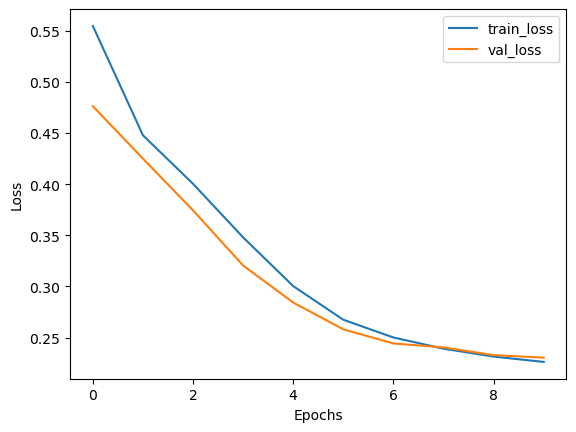

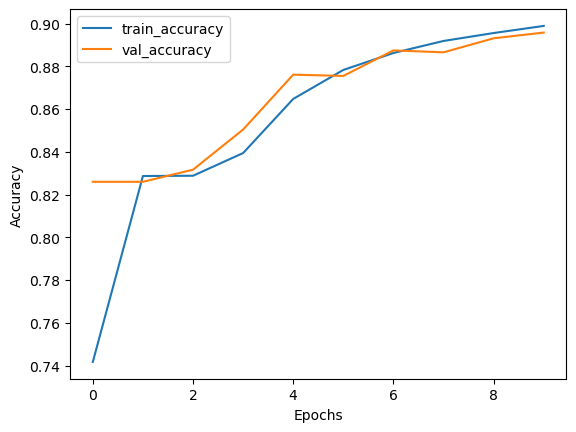

----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 0.22399704158306122, 'accuracy': 0.8982716798782349}
----------------------------------------------------------------------------------------------------


In [63]:
# callbacks=[keras.callbacks.EarlyStopping(patience=4, verbose=1), ],

def train_full_model(X_train, X_test, Y_train, Y_test):
    model = create_model()
    model.compile( loss="categorical_crossentropy",  optimizer="Adam",  metrics='accuracy' )

    history = model.fit( X_train, Y_train, batch_size = 256, epochs=10,
                        validation_split=.30,callbacks=[ keras.callbacks.EarlyStopping(patience=2, verbose=1),
                        keras.callbacks.ModelCheckpoint( "FullModelCheckpoint.h5",
                        verbose=1, save_best_only=True ), ], )

    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )


    print("-" * 100)
    print(
        "Test set evaluation: ",
        model.evaluate( X_test, Y_test , verbose=0, return_dict=True),
    )
    print("-" * 100)
    return model


full_dataset_model = train_full_model(X_train, X_test, Y_train, Y_test)

In [66]:
def train(model,X_train, Y_train):
    
    checkpoint = keras.callbacks.ModelCheckpoint(
        "AL_Model.h5", save_best_only=True, verbose=1
    )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=8, verbose=1)

    print(f"Starting to train with {len(Y_train)} samples")

    history = model.fit(X_train, Y_train, batch_size = 256, epochs=10,validation_split=.20,
                        callbacks=[checkpoint, early_stopping],
    )
    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )

    return model

In [67]:
def test(model, X_test, Y_test):
    print("-" * 100)
    print("Test set evaluation: ", model.evaluate( X_test, Y_test , verbose=0, return_dict=True), )
    print("-" * 100)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 18, 18, 2)         56        
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 9, 9, 2)          0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 162)               0         
                                                                 
 dense_30 (Dense)            (None, 16)                2608      
                                                                 
 dense_31 (Dense)            (None, 2)                 34        
                                                                 
Total params: 2,698
Trainable params: 2,698
Non-trainable params: 0
___________________________________________________

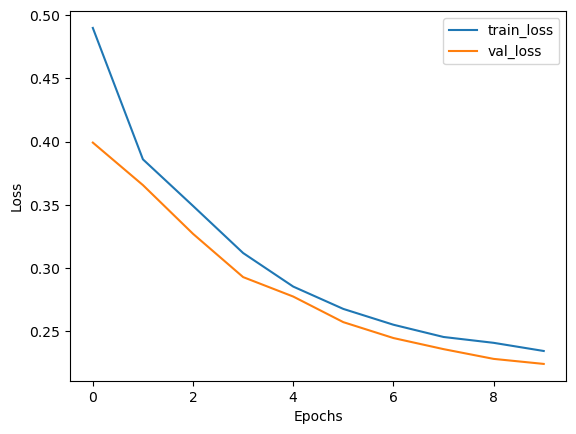

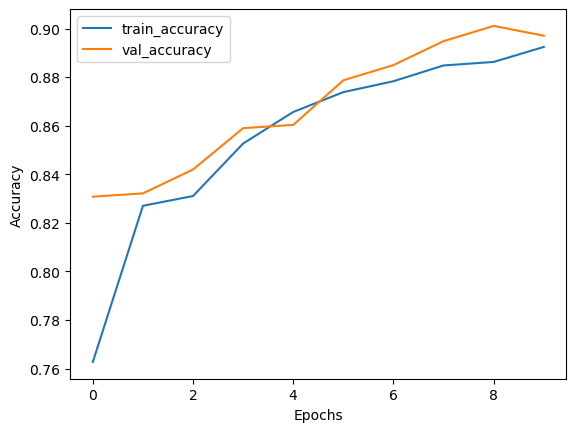




Iteration : 
0



140/140 [==============================] - 0s 2ms/step
Starting to train with 15633 samples
Epoch 1/10
49/49 [==============================] - ETA: 0s - loss: 0.2217 - accuracy: 0.9010
Epoch 1: val_loss improved from inf to 0.10143, saving model to AL_Model.h5
49/49 [==============================] - 1s 19ms/step - loss: 0.2217 - accuracy: 0.9010 - val_loss: 0.1014 - val_accuracy: 0.9834
Epoch 2/10
48/49 [============================>.] - ETA: 0s - loss: 0.2146 - accuracy: 0.9063
Epoch 2: val_loss did not improve from 0.10143
49/49 [==============================] - 1s 15ms/step - loss: 0.2150 - accuracy: 0.9063 - val_loss: 0.1030 - val_accuracy: 0.9901
Epoch 3/10
48/49 [============================>.] - ETA: 0s - loss: 0.2114 - accuracy: 0.9080
Epoch 3: val_loss did not improve from 0.10143
49/49 [==============================] - 1s 14ms/step - loss: 0.2115 - accuracy: 0.9081 - val_loss: 0.1177 - val_accuracy: 0.9763
Epoch 3: early stopping


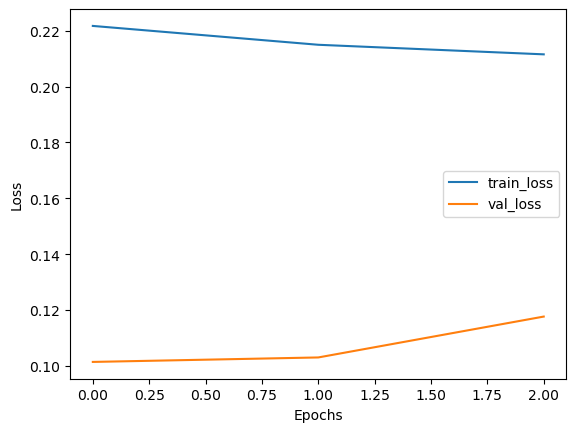

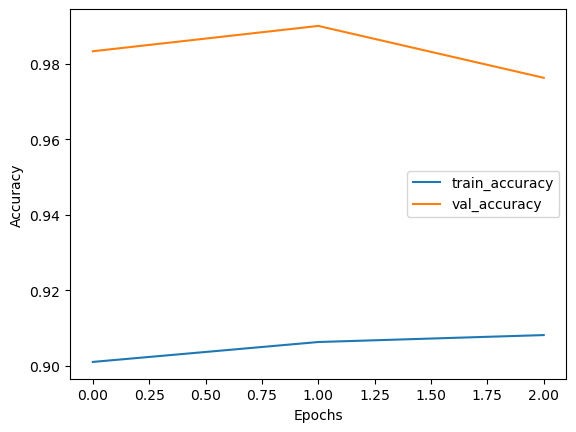




Iteration : 
1



140/140 [==============================] - 0s 2ms/step
Starting to train with 20100 samples
Epoch 1/10
62/63 [============================>.] - ETA: 0s - loss: 0.1852 - accuracy: 0.9253
Epoch 1: val_loss improved from inf to 0.09583, saving model to AL_Model.h5
63/63 [==============================] - 1s 15ms/step - loss: 0.1858 - accuracy: 0.9252 - val_loss: 0.0958 - val_accuracy: 0.9848
Epoch 2/10
61/63 [============================>.] - ETA: 0s - loss: 0.1834 - accuracy: 0.9251
Epoch 2: val_loss improved from 0.09583 to 0.09374, saving model to AL_Model.h5
63/63 [==============================] - 1s 14ms/step - loss: 0.1849 - accuracy: 0.9245 - val_loss: 0.0937 - val_accuracy: 0.9886
Epoch 3/10
60/63 [===========================>..] - ETA: 0s - loss: 0.1824 - accuracy: 0.9273
Epoch 3: val_loss did not improve from 0.09374
63/63 [==============================] - 1s 13ms/step - loss: 0.1829 - accuracy: 0.9268 - val_loss: 0.0954 - val_accuracy: 0.9910
Epoch 4/10
6

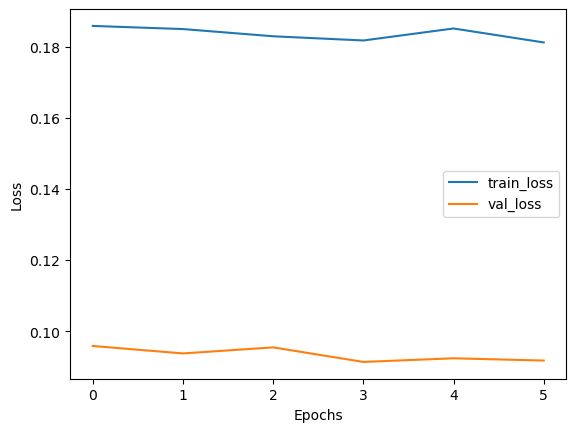

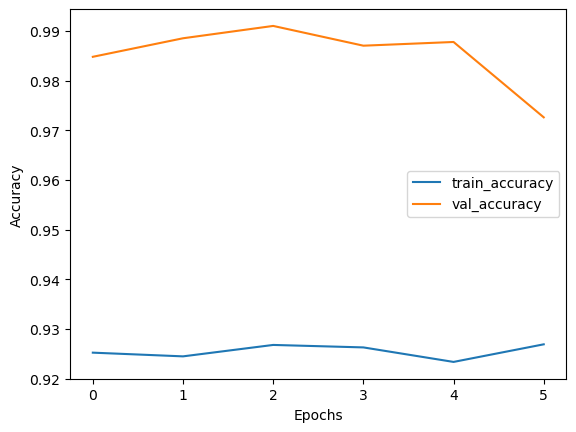




Iteration : 
2



140/140 [==============================] - 0s 2ms/step
Starting to train with 24567 samples
Epoch 1/10
77/77 [==============================] - ETA: 0s - loss: 0.1641 - accuracy: 0.9370
Epoch 1: val_loss improved from inf to 0.09638, saving model to AL_Model.h5
77/77 [==============================] - 1s 16ms/step - loss: 0.1641 - accuracy: 0.9370 - val_loss: 0.0964 - val_accuracy: 0.9689
Epoch 2/10
75/77 [============================>.] - ETA: 0s - loss: 0.1632 - accuracy: 0.9362
Epoch 2: val_loss improved from 0.09638 to 0.09324, saving model to AL_Model.h5
77/77 [==============================] - 1s 14ms/step - loss: 0.1640 - accuracy: 0.9362 - val_loss: 0.0932 - val_accuracy: 0.9705
Epoch 3/10
77/77 [==============================] - ETA: 0s - loss: 0.1633 - accuracy: 0.9357
Epoch 3: val_loss improved from 0.09324 to 0.08074, saving model to AL_Model.h5
77/77 [==============================] - 2s 20ms/step - loss: 0.1633 - accuracy: 0.9357 - val_loss: 0.0807 - 

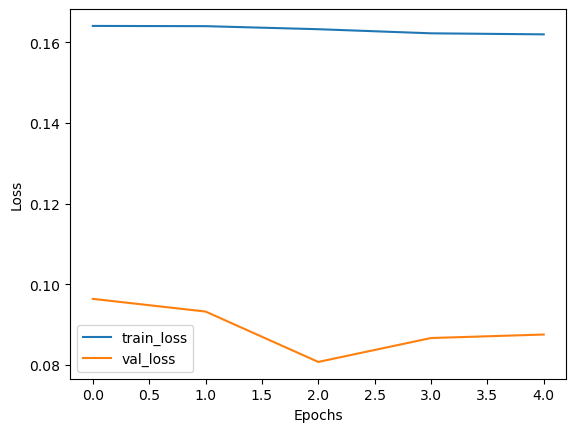

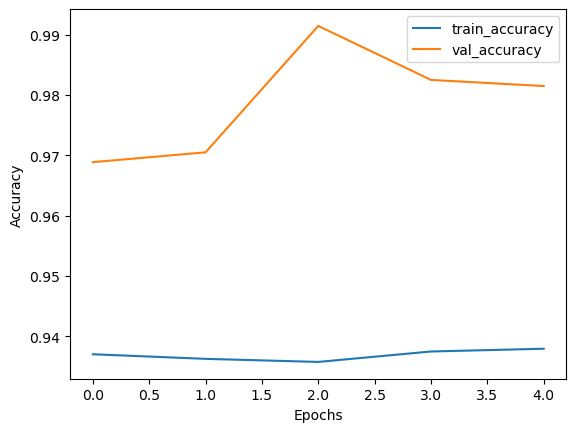




Iteration : 
3



140/140 [==============================] - 0s 3ms/step
Starting to train with 29034 samples
Epoch 1/10
91/91 [==============================] - ETA: 0s - loss: 0.1496 - accuracy: 0.9444
Epoch 1: val_loss improved from inf to 0.07740, saving model to AL_Model.h5
91/91 [==============================] - 2s 23ms/step - loss: 0.1496 - accuracy: 0.9444 - val_loss: 0.0774 - val_accuracy: 0.9912
Epoch 2/10
91/91 [==============================] - ETA: 0s - loss: 0.1495 - accuracy: 0.9434
Epoch 2: val_loss improved from 0.07740 to 0.07600, saving model to AL_Model.h5
91/91 [==============================] - 2s 22ms/step - loss: 0.1495 - accuracy: 0.9434 - val_loss: 0.0760 - val_accuracy: 0.9900
Epoch 3/10
89/91 [============================>.] - ETA: 0s - loss: 0.1491 - accuracy: 0.9442
Epoch 3: val_loss did not improve from 0.07600
91/91 [==============================] - 2s 21ms/step - loss: 0.1496 - accuracy: 0.9440 - val_loss: 0.0815 - val_accuracy: 0.9904
Epoch 4/10
8

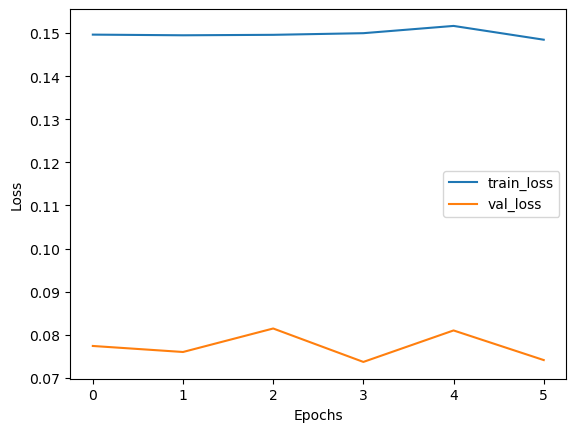

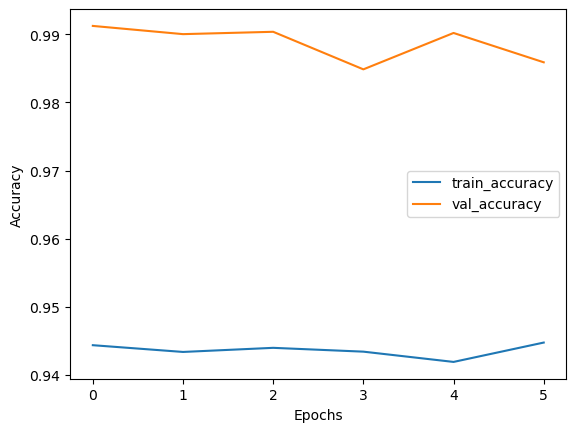

13401/13401 [==============================] - 39s 3ms/step
Starting to train with 457842 samples
Epoch 1/10
1429/1431 [============================>.] - ETA: 0s - loss: 0.0449 - accuracy: 0.9891
Epoch 1: val_loss improved from inf to 0.02239, saving model to AL_Model.h5
1431/1431 [==============================] - 30s 21ms/step - loss: 0.0449 - accuracy: 0.9891 - val_loss: 0.0224 - val_accuracy: 0.9974
Epoch 2/10
1428/1431 [============================>.] - ETA: 0s - loss: 0.0405 - accuracy: 0.9908
Epoch 2: val_loss did not improve from 0.02239
1431/1431 [==============================] - 28s 19ms/step - loss: 0.0405 - accuracy: 0.9908 - val_loss: 0.0245 - val_accuracy: 0.9913
Epoch 3/10
1430/1431 [============================>.] - ETA: 0s - loss: 0.0402 - accuracy: 0.9909
Epoch 3: val_loss improved from 0.02239 to 0.02108, saving model to AL_Model.h5
1431/1431 [==============================] - 28s 19ms/step - loss: 0.0402 - accuracy: 0.9909 - val_loss: 0.0211 - val_accuracy: 0.9976


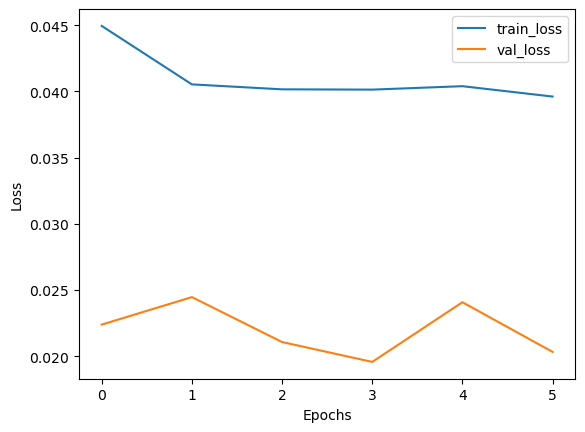

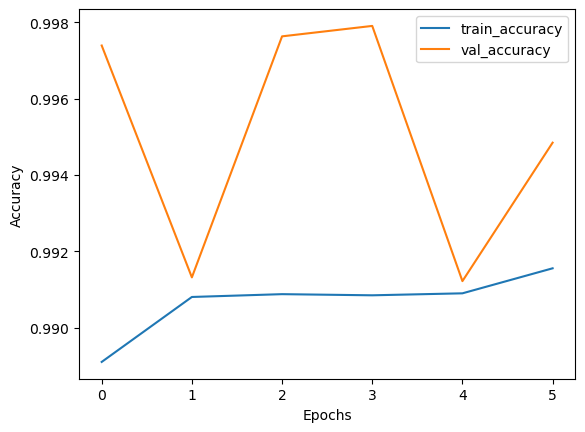

----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 0.6012630462646484, 'accuracy': 0.9016745686531067}
----------------------------------------------------------------------------------------------------


In [65]:
from sklearn.metrics import confusion_matrix
import random

def train_active_learning_models(
    X_train,
    Y_train,
    x_unlab,
    y_unlab,
    X_test,
    Y_test,
    num_iterations=5
):

    # Creating lists for storing metrics
    losses, val_losses, accuracies, val_accuracies = [], [], [], []

    model = create_model()
    # We will monitor the false positives and false negatives predicted by our model
    # These will decide the subsequent sampling ratio for every Active Learning loop
    model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics='accuracy',
    )
    
    model = train(model,X_train, Y_train)
    
    l = len(y_unlab)
    x = int(np.round( l/20 ))
    
    for iteration in range(num_iterations-1):
        
        print("\n\n")
        
        print("Iteration : ")
        
        print(iteration)
        
        print("\n\n")
         
        
        rnd = random.sample(range(1, l), x)
        all = list(range(1, l))
        main_list = list(set(all) - set(rnd))
        
        new_lab = x_unlab[rnd]
        arr = np.concatenate((X_train, new_lab))
        X_train = arr

        new_y = np.round(model.predict(new_lab))
        arr = np.concatenate((Y_train, new_y))
        Y_train = arr
        
        
        new_lab = x_unlab[main_list]
        arr = np.concatenate((x_unlab, new_lab))
        x_unlab = arr

        new_y = y_unlab[main_list]
        arr = np.concatenate((y_unlab, new_y))
        y_unlab = arr
        
        test(model, X_test, Y_test)
        
        model = train(model,X_train, Y_train)
        
    
    arr = np.concatenate((X_train, x_unlab))
    X_train = arr

    new_y = np.round(model.predict(x_unlab))
    arr = np.concatenate((Y_train, new_y))
    Y_train = arr
    
    model = train(model,X_train, Y_train)
    
    test(model, X_test, Y_test)
    
    return model

active_learning_model = train_active_learning_models(X_train,Y_train,x_unlab,y_unlab,X_test,Y_test,num_iterations=5)